In [15]:
import numpy as np 
import pandas as pd

In [19]:

ds=pd.read_csv("../data/Reddit_Data.csv")
ds.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [20]:
ds.shape

(37249, 2)

In [21]:
ds.sample()['clean_comment'].values

array(['man like frank underwood from house cards '], dtype=object)

In [22]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [23]:
ds.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [24]:
ds[ds['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [25]:
ds[ds['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [26]:
ds.dropna(inplace=True) ### dropping the data which habe null values

In [27]:
ds.duplicated().sum()

np.int64(350)

In [28]:
ds[ds.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [29]:
ds.drop_duplicates(inplace=True) ## dropping the duplicates of the data 

In [30]:
ds.duplicated().sum()

np.int64(0)

In [31]:
ds[(ds['clean_comment'].str.strip()=='')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [32]:
## Converting the comments column into lowercase 
ds['clean_comment']=ds['clean_comment'].str.lower()
ds.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [33]:
ds[ds['clean_comment'].apply(lambda x :x.endswith(' ') or x.startswith(' '))]
ds[ds['clean_comment'].apply(lambda x :x.endswith(' ') or x.startswith(' '))].shape


(32271, 2)

In [34]:
## Removing  whitespaces from the  comments column 
ds['clean_comment']=ds['clean_comment'].str.strip()
ds['clean_comment'].apply(lambda x : x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [35]:
## Identifying the comments containing new line characters 
comments_with_newline=ds[ds['clean_comment'].str.contains('/n')]
## displaying the comments containing new line characters 
comments_with_newline



,clean_comment,category


In [36]:
## removing the new lines characters from the 'clean_comments' column 
ds['clean_comment']= ds['clean_comment'].str.replace('\n',' ',regex=True) ## regular expresssions 
## verifying whether the transformation by checking for any remaining new lines
comments_with_newline_remaining=ds[ds['clean_comment'].str.contains('\n')]


### EDA

category
 1    42.86
 0    34.72
-1    22.42
Name: proportion, dtype: float64

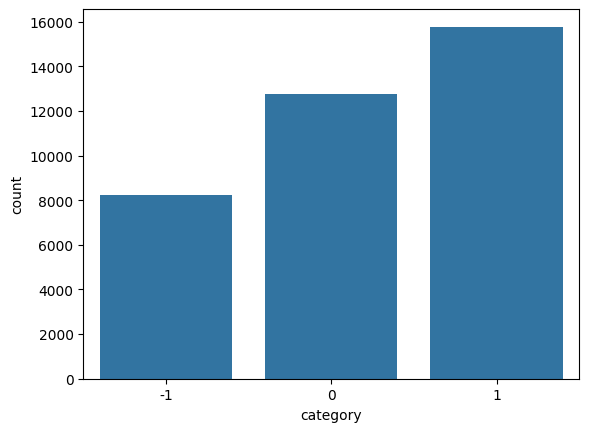

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

##distribution of classes 
sns.countplot(data=ds,x='category')
ds['category'].value_counts(normalize=True).mul(100).round(2) ## positive comments are more than negative comments 


In [38]:
ds.sample(5)

,clean_comment,category
5415,modi meets with tim cook exerts his influence ...,1
895,itt aapturds talking about corruption and revo...,1
19714,true except kunal kamra seems refreshing,1
26525,that says everything you need know about him,0
36816,wow another fascist spotted time boycott his m...,1


In [39]:
ds['word_counts']=ds['clean_comment'].apply(lambda x: len(x.split()))
ds.sample(6)

,clean_comment,category,word_counts
5702,chuitiye took hours get work manage traffic in...,0,10
33009,rashtriya national swayamsevak volunteer who v...,1,84
15412,the apps,0,2
34165,this was definitely one the harder things watc...,-1,10
19241,would seem then that there sikh separatist fac...,1,22
17623,someone tell shastri that this not what the do...,0,10


In [40]:
ds['word_counts'].describe()


count    36799.000000
mean        29.662627
std         56.787371
min          0.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_counts, dtype: float64

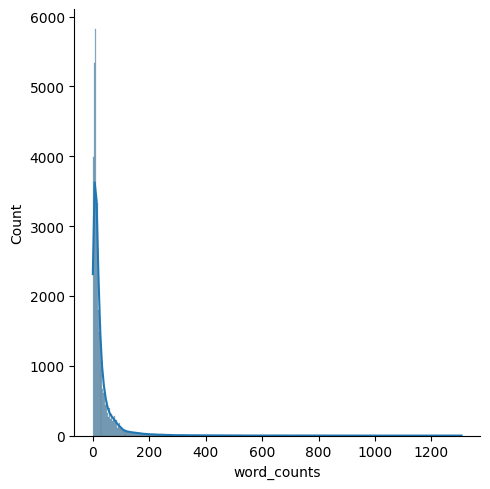

In [41]:
sns.displot(ds['word_counts'], kde=True)

AttributeError: Line2D.set() got an unexpected keyword argument 'fillna'

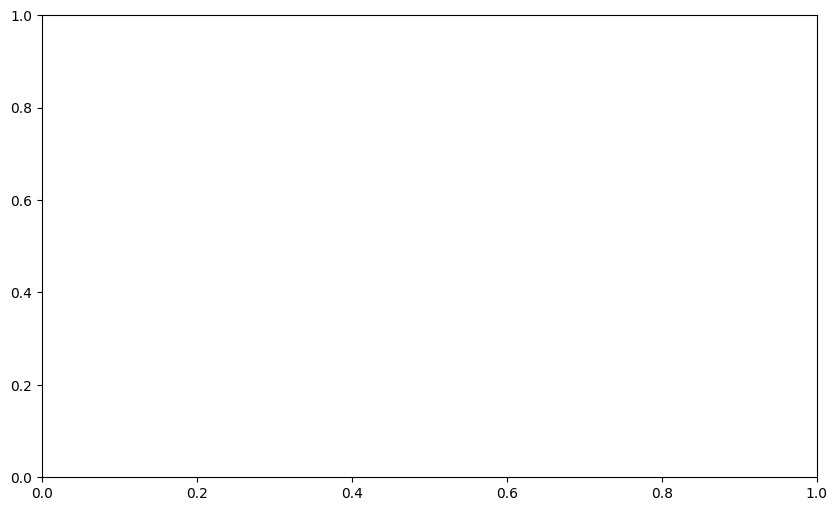

In [42]:
plt.figure(figsize=(10,6))
sns.kdeplot(ds[ds['category']==1]['word_counts'],label='Positive',fillna=True)
sns.kdeplot(ds[ds['category']==0])